# NLTK and the Basics - Example: Words Per Sentence Trends

In [1]:
import nltk

In [2]:
from nltk.corpus import inaugural

In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [7]:
fileid = '2009-Obama.txt'
pthPtr = inaugural.abspath(fileid)

In [9]:
!open {pthPtr.path}

In [11]:
for speech in inaugural.fileids():
    words_total = len(inaugural.words(speech))
    print(words_total, speech)

1538 1789-Washington.txt
147 1793-Washington.txt
2585 1797-Adams.txt
1935 1801-Jefferson.txt
2384 1805-Jefferson.txt
1265 1809-Madison.txt
1304 1813-Madison.txt
3693 1817-Monroe.txt
4909 1821-Monroe.txt
3150 1825-Adams.txt
1208 1829-Jackson.txt
1267 1833-Jackson.txt
4171 1837-VanBuren.txt
9165 1841-Harrison.txt
5196 1845-Polk.txt
1182 1849-Taylor.txt
3657 1853-Pierce.txt
3098 1857-Buchanan.txt
4005 1861-Lincoln.txt
785 1865-Lincoln.txt
1239 1869-Grant.txt
1478 1873-Grant.txt
2724 1877-Hayes.txt
3239 1881-Garfield.txt
1828 1885-Cleveland.txt
4750 1889-Harrison.txt
2153 1893-Cleveland.txt
4371 1897-McKinley.txt
2450 1901-McKinley.txt
1091 1905-Roosevelt.txt
5846 1909-Taft.txt
1905 1913-Wilson.txt
1656 1917-Wilson.txt
3756 1921-Harding.txt
4442 1925-Coolidge.txt
3890 1929-Hoover.txt
2063 1933-Roosevelt.txt
2019 1937-Roosevelt.txt
1536 1941-Roosevelt.txt
637 1945-Roosevelt.txt
2528 1949-Truman.txt
2775 1953-Eisenhower.txt
1917 1957-Eisenhower.txt
1546 1961-Kennedy.txt
1715 1965-Johnson.txt

In [12]:
max?

In [15]:
speech_length = [(speech, len(inaugural.words(speech))) for speech in inaugural.fileids()]
speech_length[0: 6]

[('1789-Washington.txt', 1538),
 ('1793-Washington.txt', 147),
 ('1797-Adams.txt', 2585),
 ('1801-Jefferson.txt', 1935),
 ('1805-Jefferson.txt', 2384),
 ('1809-Madison.txt', 1265)]

In [17]:
max(speech_length, key=lambda sl: sl[1])

('1841-Harrison.txt', 9165)

In [18]:
min(speech_length, key=lambda sl: sl[1])

('1793-Washington.txt', 147)

In [20]:
speech_wps = [(speech, float(len(inaugural.words(speech))) / float(len(inaugural.sents(speech)))) for speech in inaugural.fileids()]
speech_wps[: 6]

[('1789-Washington.txt', 64.08333333333333),
 ('1793-Washington.txt', 36.75),
 ('1797-Adams.txt', 69.86486486486487),
 ('1801-Jefferson.txt', 46.07142857142857),
 ('1805-Jefferson.txt', 52.977777777777774),
 ('1809-Madison.txt', 60.23809523809524)]

In [21]:
import pandas as pd

In [34]:
year_words = []
year_sents = []
year_wps = []

for speech in inaugural.fileids():
    year = speech[: 4]
    words = len(inaugural.words(speech))
    sents = len(inaugural.sents(speech))
    wps = float(words) / sents
    year_words.append((year, words))
    year_sents.append((year, sents))
    year_wps.append((year, wps))

In [37]:
dfWords = pd.DataFrame(year_words)
dfWords.columns = ['Year', 'Words']
dfWords.head(6)

,Year,Words
0,1789,1538
1,1793,147
2,1797,2585
3,1801,1935
4,1805,2384
5,1809,1265


In [43]:
dfSents = pd.DataFrame(year_sents)
dfSents.columns = ['Year', 'Sents']
dfSents.head(6)

,Year,Sents
0,1789,24
1,1793,4
2,1797,37
3,1801,42
4,1805,45
5,1809,21


In [44]:
dfWps = pd.DataFrame(year_wps)
dfWps.columns = ['Year', 'WPS']
dfWps.head(6)

,Year,WPS
0,1789,64.083333
1,1793,36.750000
2,1797,69.864865
3,1801,46.071429
4,1805,52.977778
5,1809,60.238095


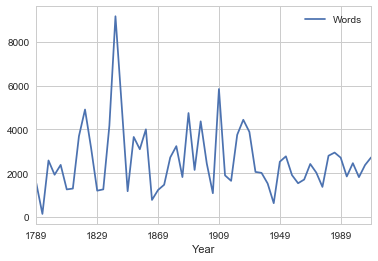

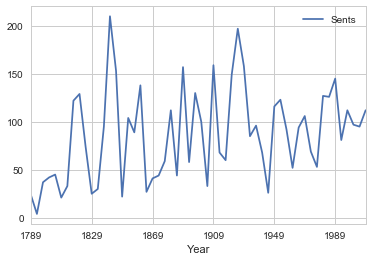

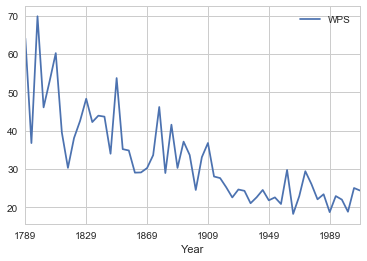

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

dfWords.plot("Year")
dfSents.plot("Year")
dfWps.plot("Year")
plt.show()